In [ ]:
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [ ]:
infile =input("Input File:")

Input File:/content/drive/MyDrive/Colab Notebooks/機器學習導論/winetxt.txt


In [ ]:
print(infile)

/content/drive/MyDrive/Colab Notebooks/機器學習導論/winetxt.txt


In [ ]:
elements = []
with open(infile) as file:
   for line in file:
      line = line.strip().split(",")
      elements.append(line)
#print(elements)
#print(np.shape(elements))

In [ ]:
int_list = np.asarray(elements)
#print(int_list)
#print(np.shape(int_list))

In [ ]:
X=np.empty((178,13))
for i in range(0,178):
    for j in range(0,14):
        if j==0:
            continue;
        else:
            x=float(int_list[i][j])
            X[i][j-1]=x
#print(X)
#print(np.shape(X))

In [ ]:
y=np.empty((178,1))
for i in range(0,178):
    for j in range(0,1):
        x=int(elements[i][j])
        y[i][j]=x
#print(y)
#print(np.shape(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)
#print(X_train)
print(np.shape(X_train))
#print(X_test)
print(np.shape(X_test))
#print(y_train)
print(np.shape(y_train))
#print(y_test)
print(np.shape(y_test))

(158, 13)
(20, 13)
(158, 1)
(20, 1)


[Text(0.5, 0.9, 'X[9] <= 3.82\ngini = 0.659\nsamples = 158\nvalue = [51, 63, 44]'),
 Text(0.3, 0.7, 'X[12] <= 1002.5\ngini = 0.101\nsamples = 56\nvalue = [3, 53, 0]'),
 Text(0.2, 0.5, 'X[2] <= 3.07\ngini = 0.036\nsamples = 54\nvalue = [1, 53, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 53\nvalue = [0, 53, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.7, 'X[6] <= 1.4\ngini = 0.583\nsamples = 102\nvalue = [48, 10, 44]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]'),
 Text(0.8, 0.5, 'X[12] <= 724.5\ngini = 0.285\nsamples = 58\nvalue = [48, 10, 0]'),
 Text(0.7, 0.3, 'X[1] <= 3.92\ngini = 0.165\nsamples = 11\nvalue = [1, 10, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]')]

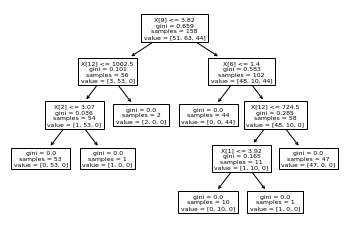

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
wine_clf = clf.fit(X_train, y_train)
tree.plot_tree(wine_clf)

In [ ]:
bag_model=BaggingClassifier(
    base_estimator=tree.DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
                  )
bag_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100)

In [ ]:
prediction=np.zeros(20)
for i in range(0,20):
    test_input=np.resize(X_test[i],(1,13))
    count=wine_clf.predict(test_input)
    prediction[i]=count[0]
print(prediction)
print(np.shape(prediction))

[1. 1. 3. 1. 2. 1. 2. 3. 2. 3. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2.]
(20,)


In [ ]:
accuracy_score(y_test, prediction)

0.9

In [ ]:
prediction2=np.zeros(20)
for i in range(0,20):
    test_input=np.resize(X_test[i],(1,13))
    count=bag_model.predict(test_input)
    prediction[i]=count[0]
print(prediction)
print(np.shape(prediction))
accuracy_score(y_test, prediction)

[1. 1. 3. 1. 2. 1. 2. 3. 2. 3. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2.]
(20,)


0.95

In [ ]:
#底下是單一案例測試用程式
while(1):
    case=int(input('請輸入0到19的整數'))
    if(case<0)or(case>19):
        continue
    else:
        break
test_input=np.resize(X_test[case],(1,13))
count=wine_clf.predict(test_input)
count2=bag_model.predict(test_input)
print('測試集中的第',case,'個,理論上是第',int(y_test[case]),'種酒')
print('用DecisionTree預測出來是第',int(count),'種酒')
print('用BaggingClassifier預測出來是第',int(count2),'種酒')
if int(y_test[case])==int(count):
    print('用DecisionTree的預測正確')
else:
    print('用DecisionTree的預測錯誤')
if int(y_test[case])==int(count2):
    print('用BaggingClassifier的預測正確')
else:
    print('用BaggingClassifier的預測錯誤')

請輸入0到19的整數10
測試集中的第 10 個,理論上是第 1 種酒
用DecisionTree預測出來是第 2 種酒
用BaggingClassifier預測出來是第 1 種酒
用DecisionTree的預測錯誤
用BaggingClassifier的預測正確
